<a href="https://colab.research.google.com/github/dphi-official/Deep_Learning_Bootcamp/blob/master/Multi_Class_Classification/Day_7_MNIST_Multi_class_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this notebook we will build a Neural Network multi-class classification model using a dataset popularly known as **'MNIST'**



# Agenda
*  About the Data
*  Loading Libraries
*  Loading Data
*  Basic EDA
*  Data Preprocessing
*  Model Building
  *  Simple Neural Network With No Hidden Layer
  *  Building Model Using Hidden Layer
*  Summary

## About the Data
**MNIST (Modified National Institute of Standards and Technology database)** is a large database of 70,000 handwritten digits. 

It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST (National Institute of Standards and Technology).

The objective here is to build a model that would recognize the correct digit that the given image is representing.



## Objective
In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will then add a hidden layer and see how the performance of the model improves

## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even if they are already installed in your system). So, we import each and every library that we want to use. Sometimes we chose alias names for our libraries for the sake of our convenience for example we **import tensorflow as tf** and similarly the other libraries


In [ ]:
import tensorflow as tf                       # deep learning library
import numpy as np                            # for matrix operations
import matplotlib.pyplot as plt               # for visualization
%matplotlib inline

## Loading Data
The MNIST dataset is available in the TensorFlow only. Let's load the data:

In [ ]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

## Basic EDA

In [ ]:
print("There are ", len(X_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset")     # checking total number of records / data points available in the X_test dataset

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[0].shape

(28, 28)

Each image in the dataset is of shape 28X28 numbers (i.e. pixels)

In [ ]:
# Take a look how one image looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Only numbers! Can't understand what digit does it represent. 

There is a function in matplotlib called as 'matshow()', it helps you to display the image of the array of numbers

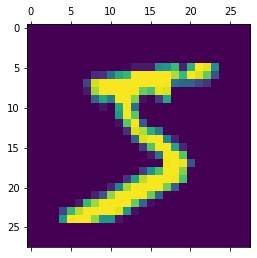

In [ ]:
plt.matshow(X_train[0])

In [ ]:
# we can use y_train to cross check
y_train[0]

5

Now one can easily say the above number is 5. Well we want to build a model that will tell you what digit does that 28X28 array represent.

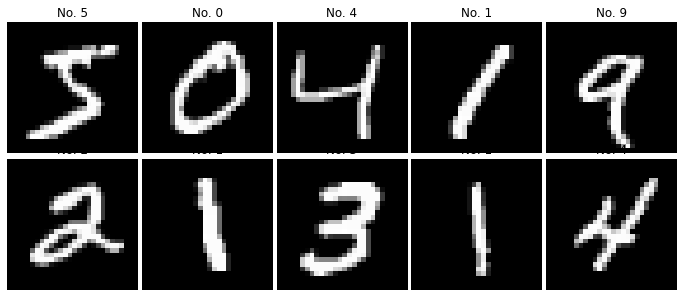

In [ ]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

Let's normalize our data (i.e. both X_train and X_test). Normalization is a process that changes the range of pixel intensity values to the range 0 to 1.

But why to normalize?

The motivation to normalize is to achieve consistency in dynamic range for a set of data, signals, or images to avoid mental distraction and reduce the data redundancy. Also, normalizing the data can help you improve the model performance.

In [ ]:

X_train = X_train / 255
X_test = X_test / 255

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\nWhy divided by 255?\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

Now if you look at the data, each pixel value should be in range 0 to 1.

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Flatten the Data**

We simply convert a 2 dimensional data (i.e. one image data) to 1 dimensional.

Why to flatten data?

Before understanding why let's check the shape of the data

In [ ]:
X_train.shape

(60000, 28, 28)

The data is 3 dimensional. The first value i.e. 60000 is nothing but the number of records or images in this case. The second and third dimension represent each individual image i.e. each image is of shape 28X28. 

Most of the the supervised learning algorithms that execute classification and regression tasks, as well as some deep learning models built for this purposes, are fed with two-dimensional data. Since we have our data as three-dimensional, we will need to flatten our data to make it two-dimensional.

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)    # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 28*28)

Now if you check the shape of our data, it should be 2 dimensional

In [ ]:
X_train_flattened.shape

(60000, 784)

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

## Building Models
### Very simple neural network with no hidden layers

![simple neural network](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/mnist1.png)

**Define the model**

In [ ]:
# Defining the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')     # The input shape is 784. 
])

The activation function used here is 'sigmoid'. Do you recall why was it so from the [Binary Classification Notebook](https://github.com/dphi-official/Deep_Learning_Bootcamp/blob/master/DL%20For%20Classification/DL_Day6_Binary_Classification.ipynb)?

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Generally for multi-class classification problem, it is suggested to use softmax. We tried both softmax activation and sigmoid activation, but sigmoid found to give better performance. You can also try using both and keep the one which gives better performance.

**Compile the model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

*  **adam** is an optimization algorithm which is faster than Stochastic Gradient Descent. If you remember from the learning material of Day 4 (i.e. working of neural networks), we know that Stochastic Gradient Descent (SGD in short) is just a type of Gradient Descent algorithm.

*  **sparse_categorical_crossentropy** is a loss function similar to **binary_crossentropy** (discussed in Binary Classification Notebook), the only difference is that if the target variable is binary we use binary_crossentropy but if your target values are normal integers more then two, use sparse categorical crossentropy. Why not use **categorical_crossentropy**? You may ask. Well, [this article](https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/) will help you understand it.

*  The metrics used to evaluate the model is **accuracy**. Accuracy calculates how often the predictions calculated by the model are correct.

**Fit the model**

In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4871 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3062 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2848 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2748 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2675 - accuracy: 0.9259


You can play with different number of epochs.

**Evaluate the model on unseen data (i.e. X_test_flattened)**

In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 842us/step - loss: 0.2669 - accuracy: 0.9255


[0.266867071390152, 0.9254999756813049]

The performance of the model on very simple model with no hidden layer is 92.6 %. Not Bad!

**predict for the X_test**

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.7843960e-05, 1.4989786e-10, 3.4405861e-05, 1.1703700e-02,
       1.0924226e-06, 7.2972442e-05, 1.3626227e-09, 6.7127508e-01,
       7.3206786e-05, 1.0240972e-03], dtype=float32)

The above numbers are the probabilities values for different digits. The maximum probability will confirm what is the predicted digit for first image in X_test.

The value at the 0th index in above array of numbers is saying the probability of the digit being 0. 

**Generalize:** The value at the nth index in above array of numbers is saying the probability of the digit being n

**np.argmax finds a maximum element from an array and returns the index of it**

In [ ]:
np.argmax(y_predicted[0])

7

The predicted digit is 7.

Let's see the original digit at first index in X_test. Can see this using matshow() function.

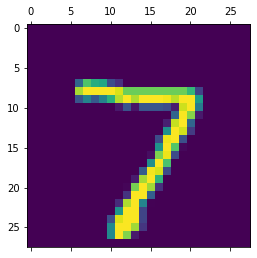

In [ ]:
plt.matshow(X_test[0])

Hence the prediction is correct

### Building Neural Network Model Using hidden layer

In [ ]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.3721 - accuracy: 0.8997
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1489 - accuracy: 0.9562
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1092 - accuracy: 0.9679
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0852 - accuracy: 0.9743
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0679 - accuracy: 0.9797


In [ ]:
# Evaluate the model
model.evaluate(X_test_flattened,y_test)

**Try yourself**: 
Change the values of epochs and try adding more hidden layers. Are you able to increase the accuracy above 97.5%?

# Saving and loading the model

In [ ]:
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist.h5 


# Summary
*  We learned why we need to normalize and flatten the data.
*  We observed the performance of very simple neural network with no hidden layer and that of with one hidden layer with 100 hidden neurons. The performance of later model was better than earlier

### **Reference**
[Neural Network For Handwritten Digits Classification](https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7)

# **Exercises**
*  Try different optimizers and losses in the above models and check the performance of the models.
  *  [Different losses that can be used](https://www.tensorflow.org/api_docs/python/tf/keras/losses)
  *  [Different optimizers that can be used](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)